In [3]:
from tensorflow import keras
import tensorflow as tfa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [ ]:
plt.figure(figsize=(9,5))
plt.matshow(x_1)

In [ ]:
x_test.shape

In [ ]:
x_train.shape

In [8]:
x_train = x_train/255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
x_train_flatten = x_train.reshape((len(x_train),28*28))

In [10]:
x_train_flatten.shape

(60000, 784)

In [11]:
from tensorflow.keras.layers import Dense, Activation,Flatten
from tensorflow.keras.models import Sequential

In [67]:
model = Sequential([Flatten(input_shape = (28,28)),Dense(10,activation='softmax'),Activation(activation='sigmoid')])

In [41]:
tb_callback = keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq = 1)

In [42]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics = ['accuracy'])

In [43]:
model.fit(x_train,y_train,epochs = 5,callbacks = [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2621 - accuracy: 0.9273 9s - loss: 0.2596  - ETA: 9s - los - ETA: 1s - loss: 0.2609 - accuracy - ETA: 1s - loss: 0.2611  - ETA: 0s - los
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2585 - accuracy: 0.9284
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2554 - accuracy: 0.9299: 0s - loss: 0.255
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2529 - accuracy: 0.9305
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2511 - accuracy: 0.9309


In [15]:
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [44]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 57.4229 - accuracy: 0.8969


[57.42287063598633, 0.8968999981880188]

In [45]:
y_test[:5]


array([7, 2, 1, 0, 4], dtype=uint8)

In [46]:
y_predict = model.predict(x_test)
np.argmax(y_predict[0])

7

In [49]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [54]:
prediction_labels = [np.argmax(i) for i in y_predict]
prediction_labels[:6],y_test[:6]

([7, 2, 1, 0, 4, 1], array([7, 2, 1, 0, 4, 1], dtype=uint8))

In [57]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = prediction_labels)

In [58]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    1,    8,    2,    7,    0],
       [   0, 1071,    2,    2,    0,    1,    4,    2,   53,    0],
       [   9,    7,  881,   22,    7,    0,   13,    6,   83,    4],
       [   5,    0,   10,  915,    1,    3,    4,    8,   57,    7],
       [   1,    1,    1,    2,  903,    0,   15,    3,   22,   34],
       [  15,    2,    0,   63,   10,  551,   23,    9,  209,   10],
       [  12,    2,    3,    2,    7,    3,  919,    1,    9,    0],
       [   2,    4,   21,   12,    5,    0,    0,  907,   12,   65],
       [   6,    2,    3,   12,    5,    2,    5,    2,  932,    5],
       [   9,    3,    1,    8,   22,    0,    0,    5,   31,  930]])>

<AxesSubplot:>

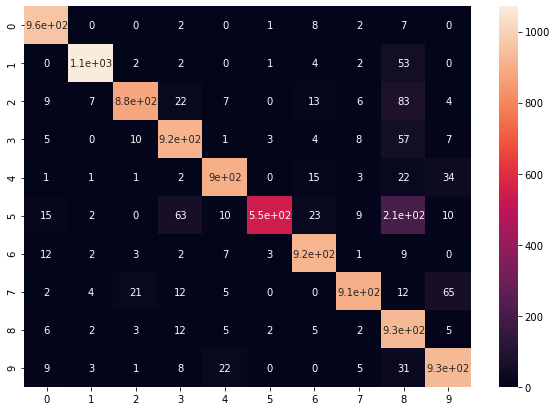

In [60]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)

In [62]:
cm2 = confusion_matrix(y_test,prediction_labels)

In [63]:
cm2

array([[ 960,    0,    0,    2,    0,    1,    8,    2,    7,    0],
       [   0, 1071,    2,    2,    0,    1,    4,    2,   53,    0],
       [   9,    7,  881,   22,    7,    0,   13,    6,   83,    4],
       [   5,    0,   10,  915,    1,    3,    4,    8,   57,    7],
       [   1,    1,    1,    2,  903,    0,   15,    3,   22,   34],
       [  15,    2,    0,   63,   10,  551,   23,    9,  209,   10],
       [  12,    2,    3,    2,    7,    3,  919,    1,    9,    0],
       [   2,    4,   21,   12,    5,    0,    0,  907,   12,   65],
       [   6,    2,    3,   12,    5,    2,    5,    2,  932,    5],
       [   9,    3,    1,    8,   22,    0,    0,    5,   31,  930]],
      dtype=int64)

<AxesSubplot:>

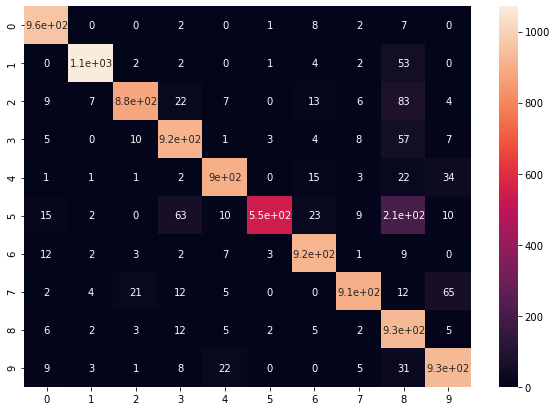

In [64]:
plt.figure(figsize=(10,7))
sn.heatmap(cm2,annot=True)